In [1557]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1558]:
df = pd.read_csv('marketing_campaign.csv', sep = '\t')

## Cleaning

In [1559]:
df.drop(columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                   'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
                   'Dt_Customer', 'ID'], inplace = True)

In [1560]:
df["Education"] = df["Education"].replace({"Basic":0,"2n Cycle":0,
                                           "Graduation":1, "Master":2,
                                           "PhD":2})

In [1561]:
df["Marital_Status"] = df["Marital_Status"].replace({"Married":1, "Together":1, "Absurd":0, "Widow":0, "YOLO":0, "Divorced":0, "Single":0,'Alone':0})

In [1562]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [1563]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Children
0,1957,1,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0
1,1954,1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,2
2,1965,1,1,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0
3,1984,1,1,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,1
4,1981,2,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,1,1,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,1
2236,1946,2,1,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,3
2237,1981,1,0,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0
2238,1956,2,1,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,1


In [1564]:
df['Amount spent on food'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts']


In [1565]:
df['Total purchases'] = df['NumCatalogPurchases'] + df['NumWebPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [1566]:
df.drop(columns = ['Kidhome', 'Teenhome'], inplace = True)

In [1567]:
df = df[(df['Income'] < 600000)]

In [1568]:
df = df[(df['Year_Birth'] > 1920)]

In [1569]:
df

,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Children,Amount spent on food,Total purchases
0,1957,1,0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,1529,25
1,1954,1,0,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,2,21,6
2,1965,1,1,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,734,21
3,1984,1,1,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,1,48,8
4,1981,2,1,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,1,407,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,1,1,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,1,1094,18
2236,1946,2,1,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,3,436,22
2237,1981,1,0,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,1217,19
2238,1956,2,1,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,1,782,23


## Scaling

In [1570]:
from sklearn.preprocessing import StandardScaler

In [1571]:
scaler = StandardScaler()

In [1572]:
scaler.fit(df)

StandardScaler()

In [1573]:
scaled_df = scaler.transform(df)

## PCA

In [1574]:
from sklearn.decomposition import PCA

In [1575]:
pca = PCA(n_components = 2)

In [1576]:
pca.fit(scaled_df)

PCA(n_components=2)

In [1577]:
x_pca = pca.transform(scaled_df)

In [1578]:
x_pca.shape

(2212, 2)

/Users/meehirbhalla/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Component 2')

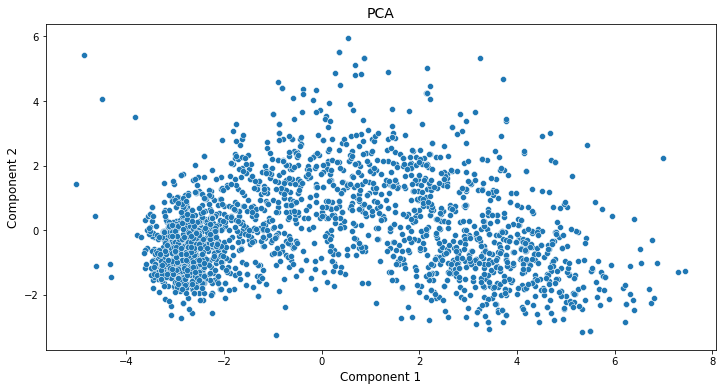

In [1579]:
plt.figure(figsize=(12,6))
sns.scatterplot(x_pca[:,0], x_pca[:,1])
plt.title('PCA', fontsize = 14)
plt.xlabel('Component 1', fontsize = 12)
plt.ylabel('Component 2', fontsize = 12)

## Apply clustering

In [1609]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)

In [1610]:
kmeans.fit(x_pca)

KMeans(n_clusters=3)

In [1611]:
scaled_df = pd.DataFrame(scaled_df)

In [1612]:
scaled_df['cluster'] = kmeans.labels_

In [1613]:
scaled_df[['cluster']]

,cluster
0,2
1,1
2,2
3,1
4,0
...,...
2207,2
2208,0
2209,2
2210,0


/Users/meehirbhalla/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Component 2')

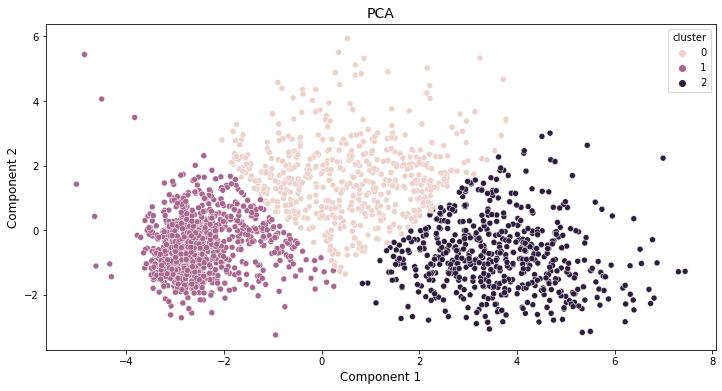

In [1614]:
plt.figure(figsize=(12,6))
sns.scatterplot(x_pca[:,0], x_pca[:,1], hue = scaled_df['cluster'])
plt.title('PCA', fontsize = 14)
plt.xlabel('Component 1', fontsize = 12)
plt.ylabel('Component 2', fontsize = 12)

## Cluster centers

In [1615]:
kmeans.cluster_centers_

array([[ 0.56583962,  1.63818423],
       [-2.5163535 , -0.47468228],
       [ 3.64255152, -0.77914988]])

### Distance to each center

In [1616]:
# Calculate distances to each center
distances = pairwise_distances(x_pca, kmeans.cluster_centers_)
distances

array([[4.1818878 , 6.96055941, 1.12585511],
       [3.82714353, 0.30599805, 6.41093336],
       [2.36899551, 4.60942896, 1.66979486],
       ...,
       [2.5598227 , 4.29015427, 1.8779676 ],
       [1.79024472, 4.88759086, 2.2021822 ],
       [2.62092129, 1.78140313, 6.01491596]])

/Users/meehirbhalla/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/meehirbhalla/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Component 2')

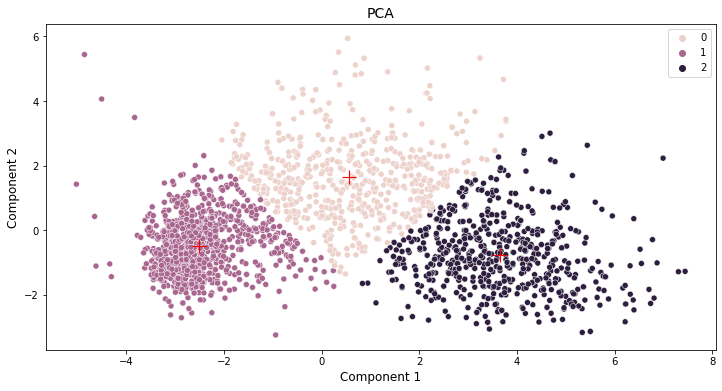

In [1617]:
plt.figure(figsize=(12,6))
sns.scatterplot(x_pca[:,0], x_pca[:,1], hue = scaled_df['cluster'])
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s=200, marker = '+')
plt.title('PCA', fontsize = 14)
plt.xlabel('Component 1', fontsize = 12)
plt.ylabel('Component 2', fontsize = 12)
# sns.scatterplot(x_pca[:,0], x_pca[:,1], c=df['Education'])

## Elbow method

In [1618]:
scores = []
for i in range(2, 10):
    print(i)
    temp_model = KMeans(n_clusters = i)
    temp_model.fit(x_pca)
    
    score = temp_model.inertia_
    scores.append((i, score))

2
3
4
5
6
7
8
9


In [1619]:
inertia_df = pd.DataFrame(scores, columns = ['k-value', 'inertia score'])
inertia_df

,k-value,inertia score
0,2,8013.733884
1,3,4676.342284
2,4,3763.192783
3,5,3155.115802
4,6,2697.307544
5,7,2282.169632
6,8,2040.543792
7,9,1817.252453


Text(0, 0.5, 'inertia score')

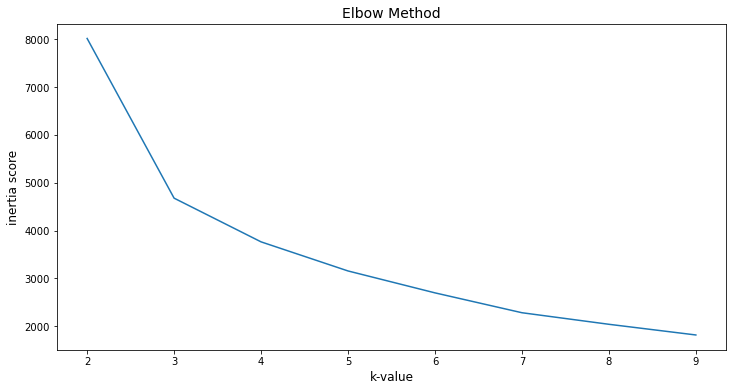

In [1620]:
plt.figure(figsize = (12,6))
sns.lineplot(x = inertia_df['k-value'], y = inertia_df['inertia score'])
plt.title('Elbow Method', fontsize = 14)
plt.xlabel('k-value', fontsize = 12)
plt.ylabel('inertia score', fontsize = 12)

In [1621]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(x_pca)

KMeans(n_clusters=4)

In [1622]:
scaled_df['cluster'] = kmeans.labels_

In [1623]:
scaled_df[['cluster']]

,cluster
0,0
1,1
2,3
3,1
4,2
...,...
2207,3
2208,2
2209,3
2210,3


/Users/meehirbhalla/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Component 2')

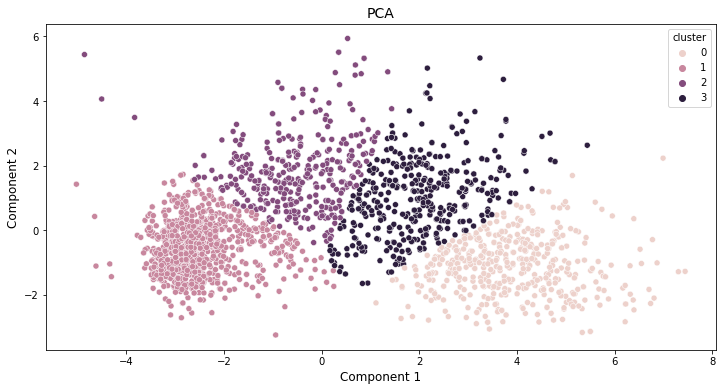

In [1624]:
plt.figure(figsize=(12,6))
sns.scatterplot(x_pca[:,0], x_pca[:,1], hue = scaled_df['cluster'])
plt.title('PCA', fontsize = 14)
plt.xlabel('Component 1', fontsize = 12)
plt.ylabel('Component 2', fontsize = 12)

In [1625]:
kmeans.cluster_centers_

array([[ 3.8903545 , -1.12553194],
       [-2.54183011, -0.55419259],
       [-0.51953206,  1.8435439 ],
       [ 1.99850228,  1.04613847]])

/Users/meehirbhalla/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/meehirbhalla/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Component 2')

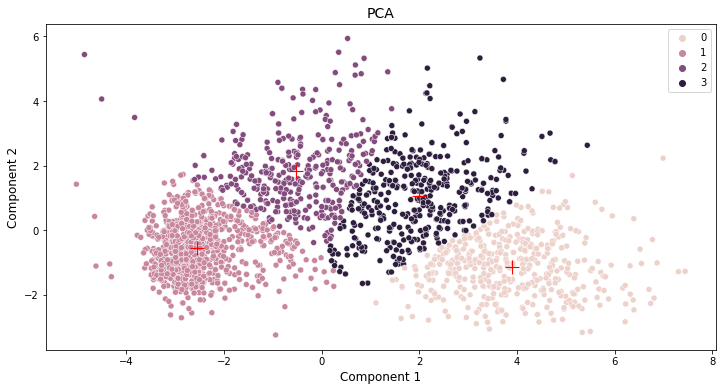

In [1626]:
plt.figure(figsize=(12,6))
sns.scatterplot(x_pca[:,0], x_pca[:,1], hue = scaled_df['cluster'])
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker = '+', s=200, color = 'red')
plt.title('PCA', fontsize = 14)
plt.xlabel('Component 1', fontsize = 12)
plt.ylabel('Component 2', fontsize = 12)

In [1627]:
df

,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Children,Amount spent on food,Total purchases
0,1957,1,0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,1529,25
1,1954,1,0,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,2,21,6
2,1965,1,1,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,734,21
3,1984,1,1,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,1,48,8
4,1981,2,1,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,1,407,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,1,1,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,1,1094,18
2236,1946,2,1,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,3,436,22
2237,1981,1,0,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,1217,19
2238,1956,2,1,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,1,782,23


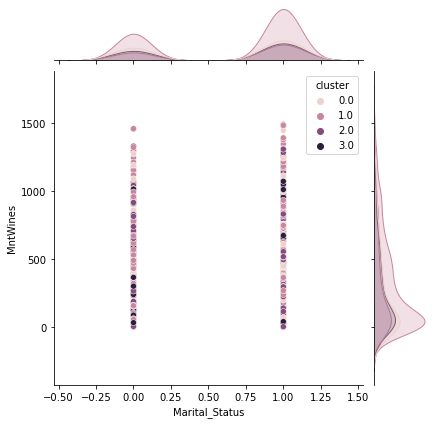

In [1628]:
sns.jointplot(x = df['Marital_Status'], y = df['MntWines'],
              hue = scaled_df['cluster'])

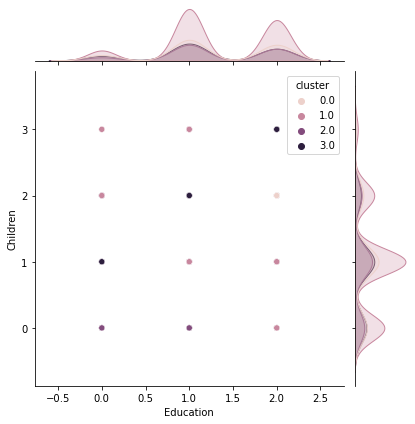

In [1629]:
sns.jointplot(x = df['Education'], y = df['Children'],
              hue = scaled_df['cluster'])

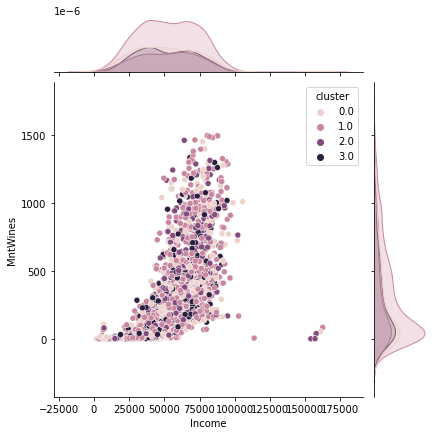

In [1630]:
sns.jointplot(x = df['Income'], y = df['MntWines'],
              hue = scaled_df['cluster'])

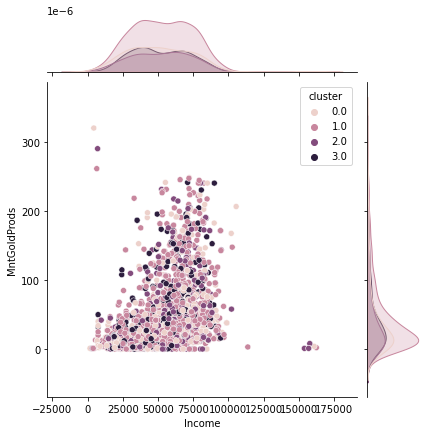

In [1631]:
sns.jointplot(x = df['Income'], y = df['MntGoldProds'],
              hue = scaled_df['cluster'])

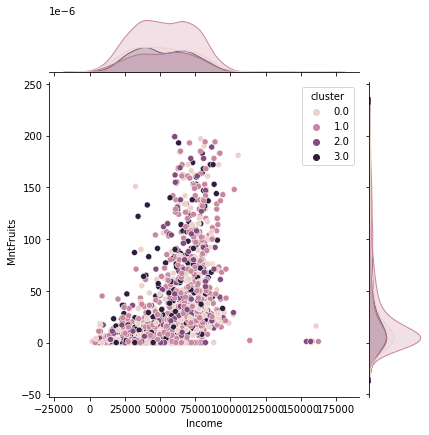

In [1642]:
sns.jointplot(x = df['Income'], y = df['MntFruits'],
              hue = scaled_df['cluster'])

In [1632]:
df

,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Children,Amount spent on food,Total purchases
0,1957,1,0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,1529,25
1,1954,1,0,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,2,21,6
2,1965,1,1,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,734,21
3,1984,1,1,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,1,48,8
4,1981,2,1,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,1,407,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,1,1,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,1,1094,18
2236,1946,2,1,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,3,436,22
2237,1981,1,0,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,1217,19
2238,1956,2,1,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,1,782,23


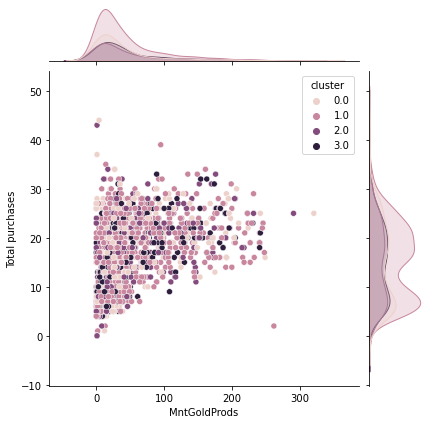

In [1641]:
sns.jointplot(x = df['MntGoldProds'], y = df['Total purchases'],
              hue = scaled_df['cluster'])